In [1]:
# import basis library which you will need to work

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.svm import SVC
import seaborn as sns 

In [2]:
data=pd.read_csv("C:\\Users\\sande\\Documents\\Data Science\\forestfires.csv")# read the file which you wnt to work
data

,Unnamed: 0,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,1,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,...,0,0,0,0,1,0,0,0,0,small
1,2,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,...,0,0,0,0,0,0,0,1,0,small
2,3,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,...,0,0,0,0,0,0,0,1,0,small
3,4,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,...,0,0,0,0,1,0,0,0,0,small
4,5,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,513,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,...,0,0,0,0,0,0,0,0,0,large
513,514,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,...,0,0,0,0,0,0,0,0,0,large
514,515,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,...,0,0,0,0,0,0,0,0,0,large
515,516,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,...,0,0,0,0,0,0,0,0,0,small


In [3]:
data.info()#get the basis informtion about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     517 non-null    int64  
 1   month          517 non-null    object 
 2   day            517 non-null    object 
 3   FFMC           517 non-null    float64
 4   DMC            517 non-null    float64
 5   DC             517 non-null    float64
 6   ISI            517 non-null    float64
 7   temp           517 non-null    float64
 8   RH             517 non-null    int64  
 9   wind           517 non-null    float64
 10  rain           517 non-null    float64
 11  area           517 non-null    float64
 12  dayfri         517 non-null    int64  
 13  daymon         517 non-null    int64  
 14  daysat         517 non-null    int64  
 15  daysun         517 non-null    int64  
 16  daythu         517 non-null    int64  
 17  daytue         517 non-null    int64  
 18  daywed    

In [5]:
data.nunique()

month             12
day                7
FFMC             106
DMC              215
DC               219
ISI              119
temp             192
RH                75
wind              21
rain               7
area             251
dayfri             2
daymon             2
daysat             2
daysun             2
daythu             2
daytue             2
daywed             2
monthapr           2
monthaug           2
monthdec           2
monthfeb           2
monthjan           2
monthjul           2
monthjun           2
monthmar           2
monthmay           2
monthnov           2
monthoct           2
monthsep           2
size_category      2
dtype: int64

In [4]:
label=preprocessing.LabelEncoder()
data['size_category']=label.fit_transform(data.size_category)
data['month']=label.fit_transform(data.month)
data['day']=label.fit_transform(data.day)
data 

,Unnamed: 0,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,1,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,...,0,0,0,0,1,0,0,0,0,1
1,2,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,...,0,0,0,0,0,0,0,1,0,1
2,3,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,...,0,0,0,0,0,0,0,1,0,1
3,4,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,...,0,0,0,0,1,0,0,0,0,1
4,5,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,513,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,...,0,0,0,0,0,0,0,0,0,0
513,514,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,...,0,0,0,0,0,0,0,0,0,0
514,515,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,...,0,0,0,0,0,0,0,0,0,0
515,516,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,...,0,0,0,0,0,0,0,0,0,1


In [5]:
data1=data.drop(['dayfri','daymon','daysat','daysun','daythu','daytue','daywed','monthapr','monthaug','monthaug','monthdec','monthfeb','monthjan','monthjul','monthjun','monthmar','monthmay','monthnov','monthoct','monthsep'],axis=1)
data1

,Unnamed: 0,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,1,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1
1,2,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,1
2,3,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,1
3,4,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1
4,5,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,513,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0
513,514,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0
514,515,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0
515,516,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,1


In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     517 non-null    int64  
 1   month          517 non-null    int32  
 2   day            517 non-null    int32  
 3   FFMC           517 non-null    float64
 4   DMC            517 non-null    float64
 5   DC             517 non-null    float64
 6   ISI            517 non-null    float64
 7   temp           517 non-null    float64
 8   RH             517 non-null    int64  
 9   wind           517 non-null    float64
 10  rain           517 non-null    float64
 11  area           517 non-null    float64
 12  size_category  517 non-null    int32  
dtypes: float64(8), int32(3), int64(2)
memory usage: 46.6 KB


In [7]:
data1.describe()

,Unnamed: 0,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,259.000000,5.758221,2.736944,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.731141
std,149.389312,4.373275,1.925061,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.443796
min,1.000000,0.000000,0.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000
25%,130.000000,1.000000,1.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000
50%,259.000000,6.000000,3.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,1.000000
75%,388.000000,11.000000,4.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,1.000000
max,517.000000,11.000000,6.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000


C:\Users\sande\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


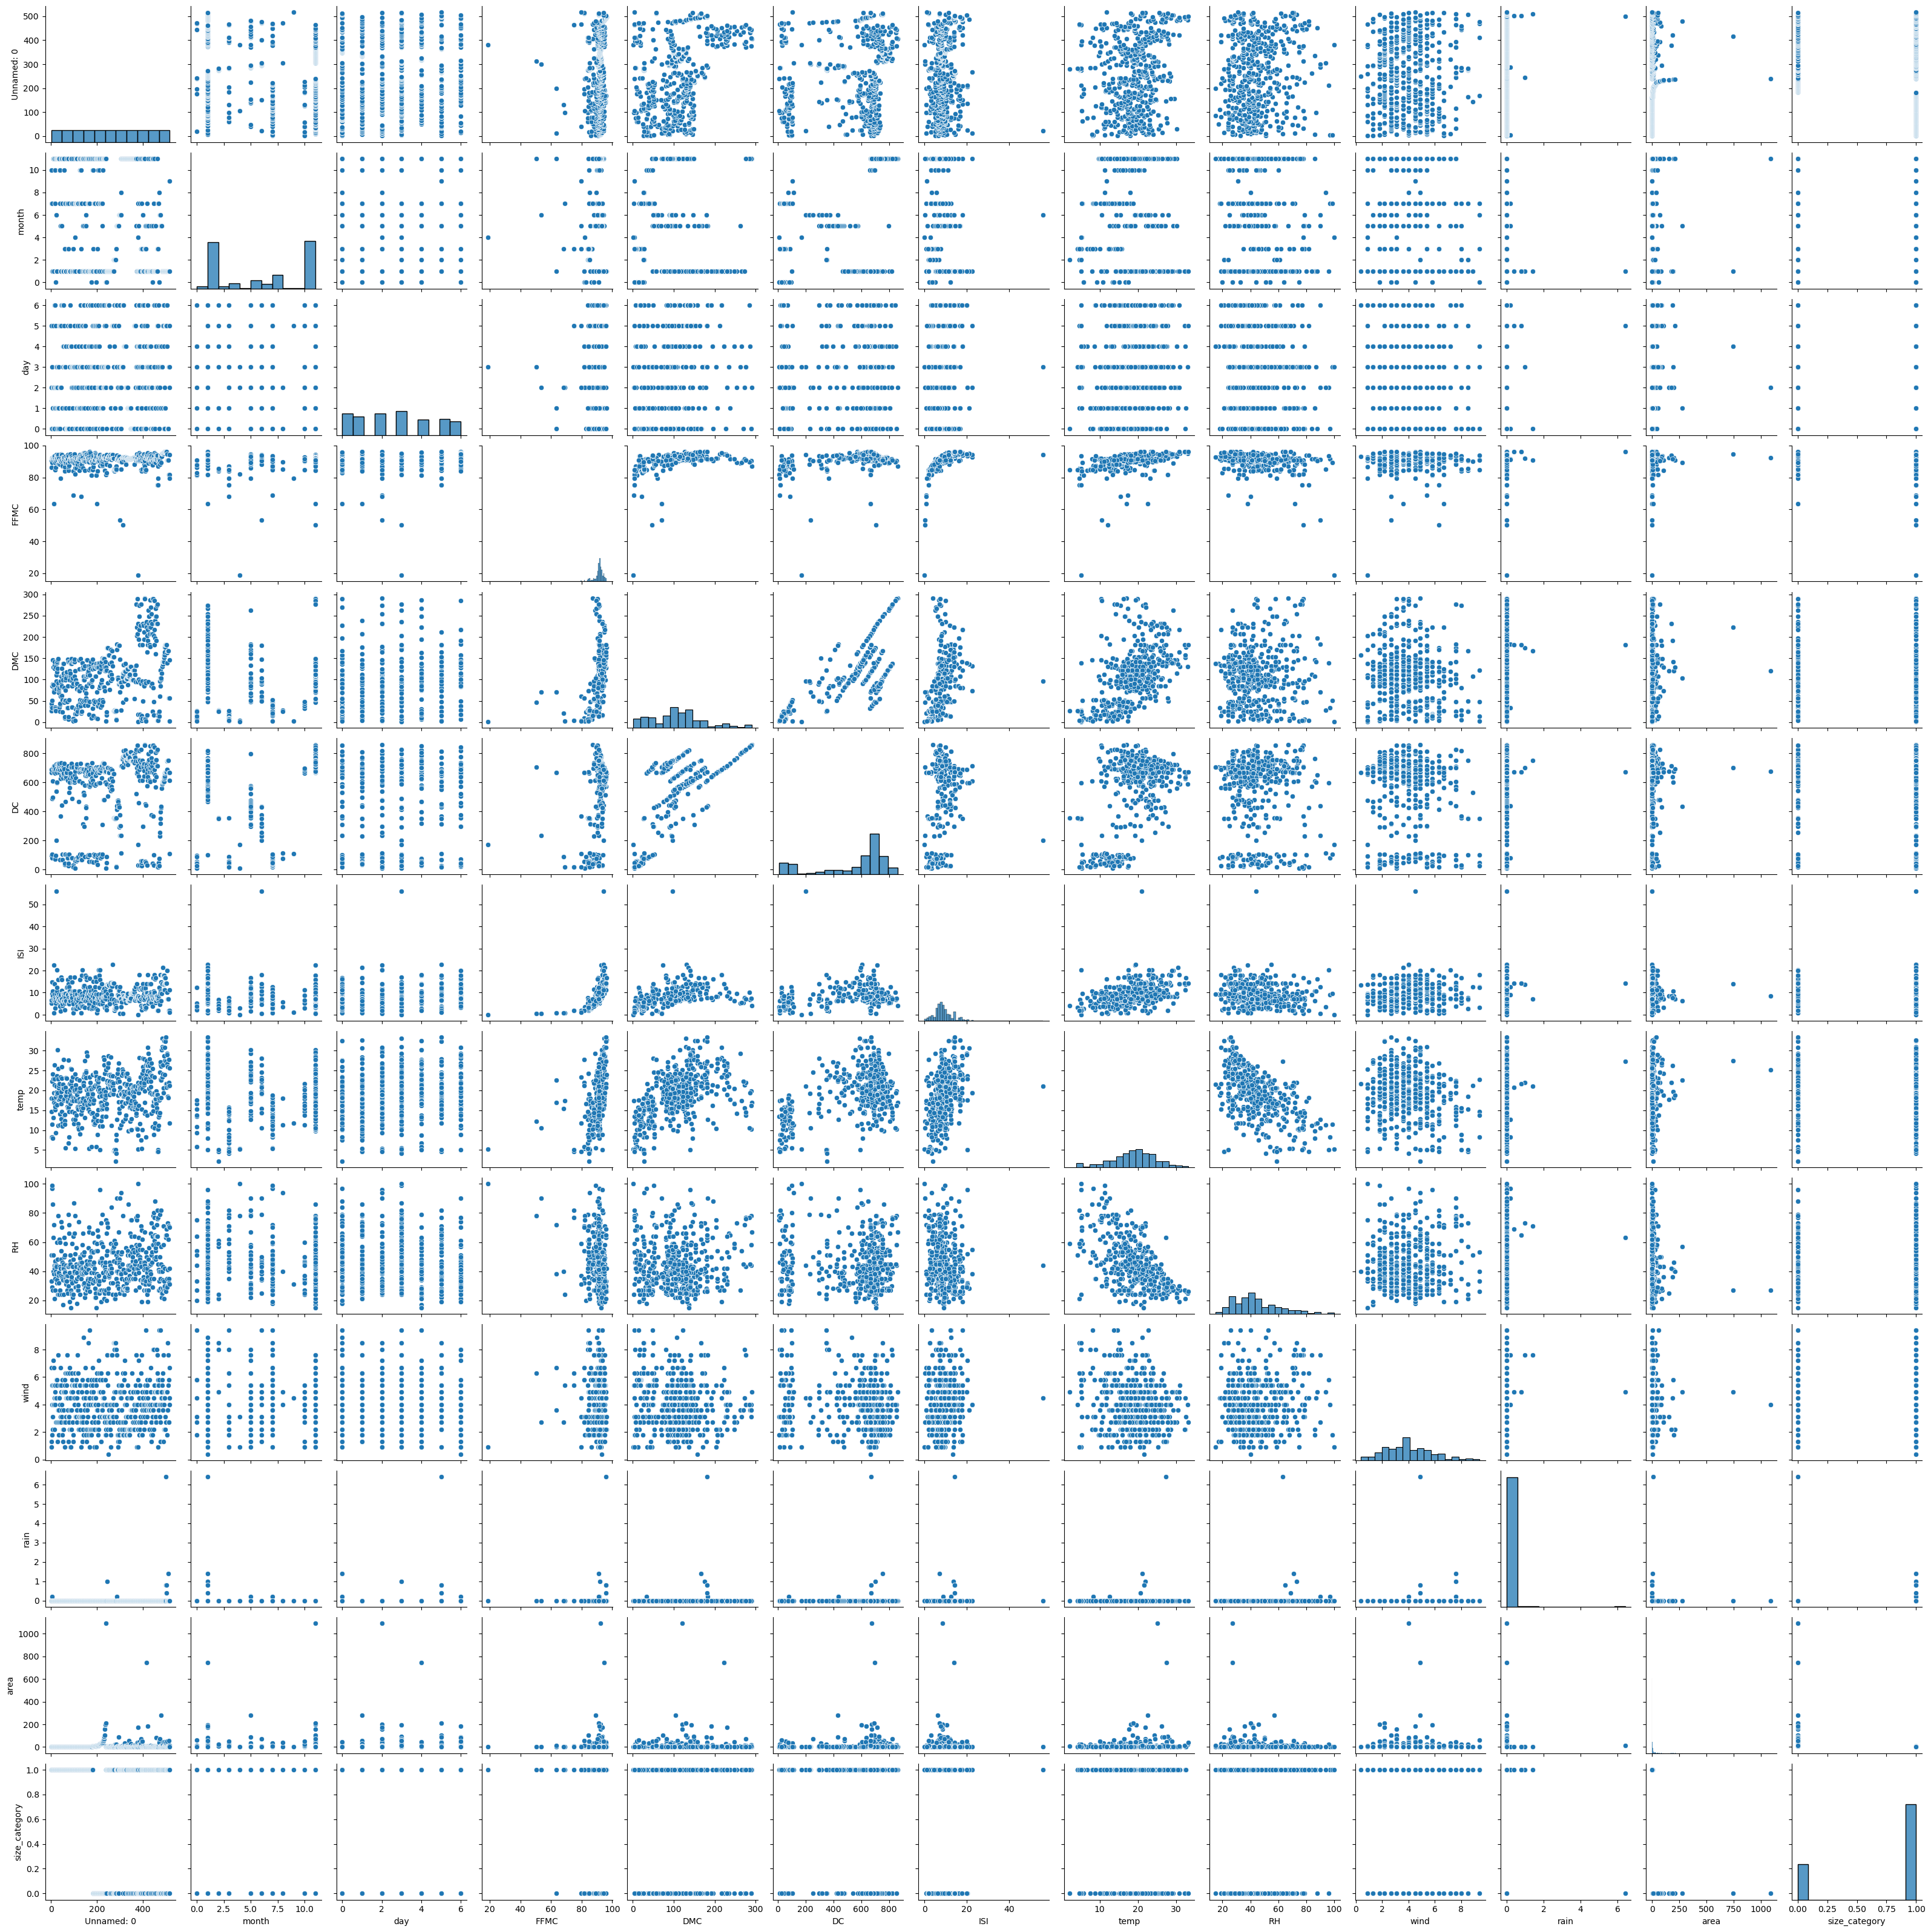

In [8]:
sns.pairplot(data1)

In [9]:
data1.nunique()

Unnamed: 0       517
month             12
day                7
FFMC             106
DMC              215
DC               219
ISI              119
temp             192
RH                75
wind              21
rain               7
area             251
size_category      2
dtype: int64

In [10]:
x=data1.iloc[:,0:-1]
x

,Unnamed: 0,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,1,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,2,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,3,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,4,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,5,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
512,513,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,514,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,515,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,516,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [11]:
y=data1.iloc[:,-1]
y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int32

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=3)#spliting the data into test and train 

In [13]:
model=SVC()
param=[{'kernel':['rbf','linear'],'gamma':[10,2,3,5,0.5,1,0.1,0.03],'C':[0.05,0.5,0.3,1,2.5]}]##taking the different values of the gamma and the tolerance C,and two models rgf,linear

In [16]:
gsv=GridSearchCV(estimator=model,param_grid=param,cv=10)

In [17]:
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [0.05, 0.5, 0.3, 1, 2.5],
                          'gamma': [10, 2, 3, 5, 0.5, 1, 0.1, 0.03],
                          'kernel': ['rbf', 'linear']}])

In [18]:
gsv.best_params_ , gsv.best_score_ 

({'C': 0.05, 'gamma': 10, 'kernel': 'linear'}, 0.9834834834834835)

In [25]:
clf = SVC(C= 15, gamma = 50)
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = (y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = (16     1
218    0
418    1
102    1
441    1
      ..
272    1
471    0
230    0
128    1
491    1
Name: size_category, Length: 156, dtype: int32, array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1]), 16     1
218    0
418    1
102    1
441    1
      ..
272    1
471    0
230    0
128    1
491    1
Name: size_category, Length: 156, dtype: int32, array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 

NameError: name 'confusion_matrix' is not defined